In [1]:
import tensorflow as tf
import csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
import mglearn
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize, LabelEncoder
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras import optimizers
from keras.layers.advanced_activations import PReLU, LeakyReLU

Using TensorFlow backend.


In [2]:
%matplotlib inline

### Reading the CSV file and cleaning

feature dataframe has the features read except for the first (seq_num) and the last column (label)
The dataframe also drop the Glucose column and replaces all NaN values and 7,9 (in labels) to 0

Features were also normalized - (features - features.mean())/features.std()

In [3]:
df = pd.read_csv('../../Data/diabetesdataV1-1.csv')
df = df.iloc[:, 1:]

# dropping all NaN in the dataframe
df = df.dropna(axis=0, how='any')

#Age more than 20
df = df[df.Age > 19]

# Setting Glucose Level >= 99 to be diabetic and Less than 100 to be Normal
df.Diabetes[df.Glucose >= 99] = 1
df.Diabetes[df.Glucose < 99] = 0

# print df

print "Cleaned label counts:"
print df.groupby('Diabetes').size()

#separating features and labels
features = df.iloc[:, 0:-2]
label = df.iloc[:,-2]

# print "\n"
print "Columns in the features"
column_names = list(features)
print column_names
# # #normalizing features - unnormalized also results in similar results
normalized_features = (features - features.mean())/(features.max() - features.min())
# normalized_features = (features - features.mean())/features.std()

Cleaned label counts:
Diabetes
0.0    3710
1.0    2586
dtype: int64
Columns in the features
['Gender', 'Age', 'RaceEth', 'Weight', 'Height', 'BMI', 'Waist', 'PhysAct']


/Users/somya/virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Pair-plotting of features - Red is Diabetic, Blue Non-Diabetic

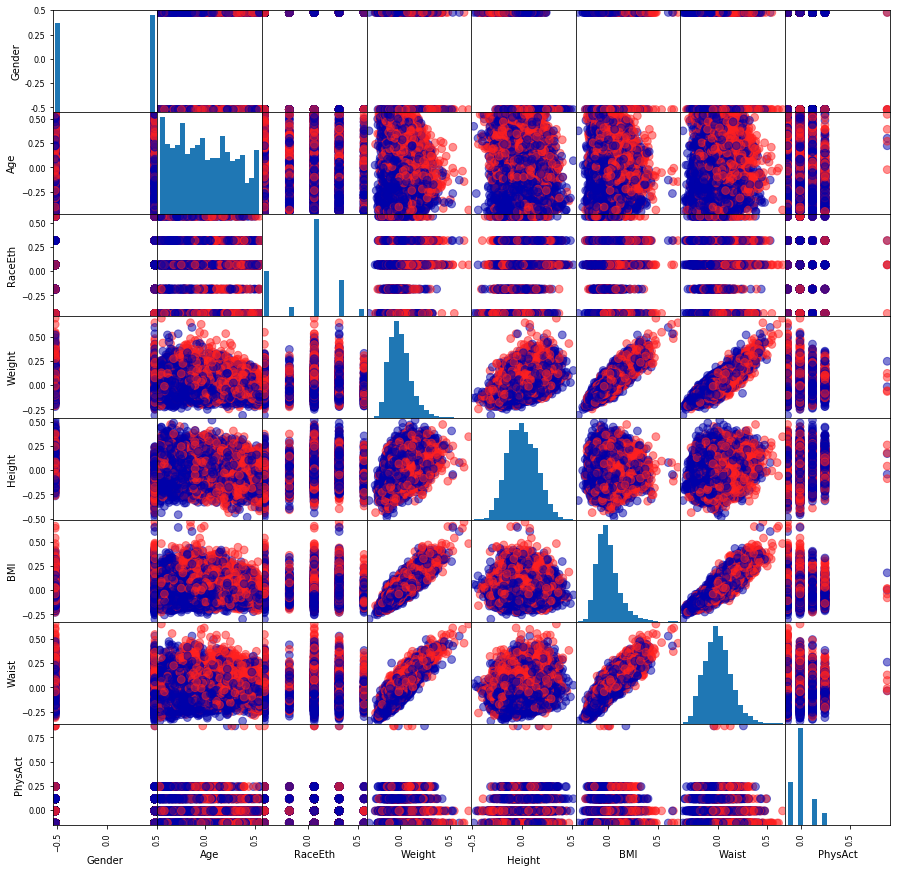

In [4]:
# create a scatter matrix from the dataframe, color by y
grr = pd.scatter_matrix(normalized_features, c=label, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.5, cmap=mglearn.cm2)

### Formatting input for Machine Learning

In [5]:
# X = features.as_matrix()
X = normalized_features.as_matrix()

Y = label.as_matrix()

print "Shape of the matrices"
print X.shape
print Y.shape

print "\n"
print "Total unique counts by labels"
print np.unique(Y, return_counts=True)

# 70% training and 30% test 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print "\n"
print "Total unique counts by labels for training and testing"
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print np.unique(y_train, return_counts=True)
print np.unique(y_test, return_counts=True)

y_train = keras.utils.to_categorical(y_train, num_classes=None)

print y_train
# y_test = keras.utils.to_categorical(y_test, num_classes=None)


Shape of the matrices
(6296, 8)
(6296,)


Total unique counts by labels
(array([ 0.,  1.]), array([3710, 2586]))


Total unique counts by labels for training and testing
(4407, 'train sequences')
(1889, 'test sequences')
(array([ 0.,  1.]), array([2592, 1815]))
(array([ 0.,  1.]), array([1118,  771]))
[[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]


#### Deeplearning

###### Model building

In [47]:
model = Sequential()
model.add(Dense(64, input_shape=(8,), init='normal'))
model.add(Dense(128, init='normal', activation='tanh'))
model.add(Dense(64, init='normal', activation='relu'))
model.add(Dense(32, init='normal', activation='relu'))
model.add(Dense(2, init='normal', activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(x_train, y_train, validation_split=0.0, nb_epoch=50,
                    batch_size=10, verbose=2, )

/Users/somya/virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="normal", input_shape=(8,))`
  from ipykernel import kernelapp as app
/Users/somya/virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", kernel_initializer="normal")`
  app.launch_new_instance()
/Users/somya/virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="normal")`
/Users/somya/virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="normal")`
/Users/somya/virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 A

Epoch 1/50
1s - loss: 0.5932 - acc: 0.6882
Epoch 2/50
1s - loss: 0.5744 - acc: 0.6980
Epoch 3/50
1s - loss: 0.5732 - acc: 0.7012
Epoch 4/50
1s - loss: 0.5739 - acc: 0.6996
Epoch 5/50
1s - loss: 0.5719 - acc: 0.7041
Epoch 6/50
1s - loss: 0.5744 - acc: 0.7023
Epoch 7/50
1s - loss: 0.5720 - acc: 0.6998
Epoch 8/50
1s - loss: 0.5725 - acc: 0.7032
Epoch 9/50
1s - loss: 0.5733 - acc: 0.7039
Epoch 10/50
1s - loss: 0.5720 - acc: 0.7034
Epoch 11/50
1s - loss: 0.5722 - acc: 0.7055
Epoch 12/50
1s - loss: 0.5697 - acc: 0.7021
Epoch 13/50
1s - loss: 0.5689 - acc: 0.7025
Epoch 14/50
1s - loss: 0.5677 - acc: 0.7030
Epoch 15/50
1s - loss: 0.5661 - acc: 0.7018
Epoch 16/50
1s - loss: 0.5671 - acc: 0.7082
Epoch 17/50
1s - loss: 0.5664 - acc: 0.7034
Epoch 18/50
1s - loss: 0.5670 - acc: 0.7071
Epoch 19/50
1s - loss: 0.5666 - acc: 0.7077
Epoch 20/50
1s - loss: 0.5665 - acc: 0.7005
Epoch 21/50
1s - loss: 0.5663 - acc: 0.7052
Epoch 22/50
1s - loss: 0.5655 - acc: 0.7041
Epoch 23/50
1s - loss: 0.5643 - acc: 0.70

In [48]:
y_predict = model.predict_classes(x_test, batch_size=10, verbose=0)

In [49]:
print "Test Data"
print y_test
unique, counts = np.unique(y_test, return_counts=True)
print dict(zip(unique, counts))

print '\n'
print "Predicted Data"
print y_predict
unique, counts = np.unique(y_predict, return_counts=True)
print dict(zip(unique, counts))

Test Data
[ 0.  1.  0. ...,  0.  0.  0.]
{0.0: 1118, 1.0: 771}


Predicted Data
[0 0 0 ..., 1 0 1]
{0: 1145, 1: 744}


In [50]:
import itertools
from sklearn import tree, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# These are the tuned paramters

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

     Normal       0.74      0.76      0.75      1118
   Daibetic       0.64      0.61      0.62       771

avg / total       0.70      0.70      0.70      1889

Confusion matrix, without normalization
[[847 271]
 [298 473]]


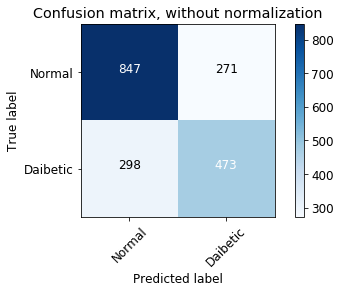

In [51]:
result = {}
result['recall'] = recall_score(y_test, y_predict,
                                average='weighted')
result['accuracy'] = accuracy_score(y_test, y_predict)
result['precision'] = precision_score(y_test, y_predict,
                                      average='weighted')
cnf_matrix = confusion_matrix(y_test, y_predict)

target_names = ['Normal', 'Daibetic']
print(classification_report(y_test, y_predict, target_names=target_names))
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix, without normalization')

In [52]:
print "Accuracy TP/TN"
print((TP + TN) / float(TP + TN + FP + FN))

print '\n'
print "Classification error"
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print classification_error

print '\n'
print "Sensitivity / Recall"
sensitivity = TP / float(FN + TP)
print(sensitivity)

print '\n'
print "Specificity"
specificity = TN / float(TN + FP)
print(specificity)

print '\n'
print "False Positive Rate"
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

print '\n'
print "Precision"
precision = TP 

Accuracy TP/TN
0.695076760191


Classification error
0.304923239809


Sensitivity / Recall
0.612191958495


Specificity
0.752236135957


False Positive Rate
0.247763864043
0.247763864043


Precision


In [53]:
y_pred_prob = model.predict(x_test, batch_size=10, verbose=0)

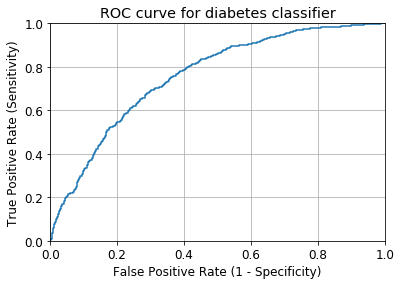

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [56]:
print(roc_auc_score(y_test, y_pred_prob[:, 1]))

0.757617943845


In [57]:
y_predict[:30]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1])

In [58]:
print y_pred_prob[:30]

[[ 0.67380047  0.45069706]
 [ 0.81570417  0.35030559]
 [ 0.51856506  0.50450033]
 [ 0.51236534  0.54579973]
 [ 0.39000505  0.96555591]
 [ 0.36474723  0.90711653]
 [ 0.9612354   0.14136451]
 [ 0.5899536   0.88409621]
 [ 0.80167228  0.36761737]
 [ 0.95324039  0.07163988]
 [ 0.93651098  0.09680954]
 [ 0.58130509  0.85485756]
 [ 0.98539114  0.03849332]
 [ 0.97387683  0.0634734 ]
 [ 0.93782246  0.10002702]
 [ 0.64582193  0.86301023]
 [ 0.62909353  0.39422521]
 [ 0.59912312  0.62753856]
 [ 0.66054046  0.63702571]
 [ 0.57864642  0.72369677]
 [ 0.49067378  0.8291288 ]
 [ 0.97078395  0.06071442]
 [ 0.41418704  0.93264121]
 [ 0.87491101  0.22124517]
 [ 0.94778341  0.11224398]
 [ 0.9685573   0.067159  ]
 [ 0.45766157  0.79095554]
 [ 0.63461548  0.68249041]
 [ 0.97623479  0.05729716]
 [ 0.41176239  0.93375766]]


In [59]:
np.around(y_pred_prob, decimals=3)[:30]

array([[ 0.67400002,  0.45100001],
       [ 0.81599998,  0.34999999],
       [ 0.51899999,  0.505     ],
       [ 0.51200002,  0.546     ],
       [ 0.38999999,  0.96600002],
       [ 0.36500001,  0.90700001],
       [ 0.96100003,  0.141     ],
       [ 0.58999997,  0.884     ],
       [ 0.80199999,  0.368     ],
       [ 0.95300001,  0.072     ],
       [ 0.93699998,  0.097     ],
       [ 0.58099997,  0.85500002],
       [ 0.98500001,  0.038     ],
       [ 0.97399998,  0.063     ],
       [ 0.93800002,  0.1       ],
       [ 0.64600003,  0.86299998],
       [ 0.62900001,  0.39399999],
       [ 0.59899998,  0.62800002],
       [ 0.66100001,  0.63700002],
       [ 0.579     ,  0.72399998],
       [ 0.491     ,  0.829     ],
       [ 0.97100002,  0.061     ],
       [ 0.414     ,  0.93300003],
       [ 0.875     ,  0.221     ],
       [ 0.94800001,  0.112     ],
       [ 0.96899998,  0.067     ],
       [ 0.458     ,  0.79100001],
       [ 0.63499999,  0.68199998],
       [ 0.97600001,

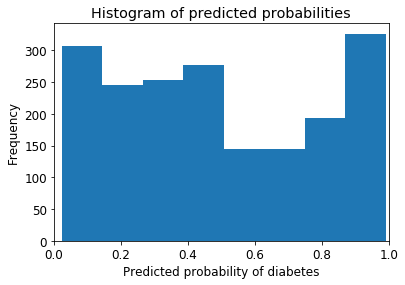

In [60]:
# adjust the font size 
plt.rcParams['font.size'] = 12


# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob[:, 1], bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [61]:
# predict diabetes if the predicted probability is greater than 0.2
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.2 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(y_pred_prob[:, 1], 0.20)[0]

/Users/somya/virtualenvs/ml/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [62]:
y_pred_prob[0:20]

array([[ 0.67380047,  0.45069706],
       [ 0.81570417,  0.35030559],
       [ 0.51856506,  0.50450033],
       [ 0.51236534,  0.54579973],
       [ 0.39000505,  0.96555591],
       [ 0.36474723,  0.90711653],
       [ 0.9612354 ,  0.14136451],
       [ 0.5899536 ,  0.88409621],
       [ 0.80167228,  0.36761737],
       [ 0.95324039,  0.07163988],
       [ 0.93651098,  0.09680954],
       [ 0.58130509,  0.85485756],
       [ 0.98539114,  0.03849332],
       [ 0.97387683,  0.0634734 ],
       [ 0.93782246,  0.10002702],
       [ 0.64582193,  0.86301023],
       [ 0.62909353,  0.39422521],
       [ 0.59912312,  0.62753856],
       [ 0.66054046,  0.63702571],
       [ 0.57864642,  0.72369677]], dtype=float32)

In [63]:
y_pred_class[:20]
# # new confusion matrix (threshold of 0.3)
print(confusion_matrix(y_test, y_pred_class))

[[368 750]
 [ 47 724]]


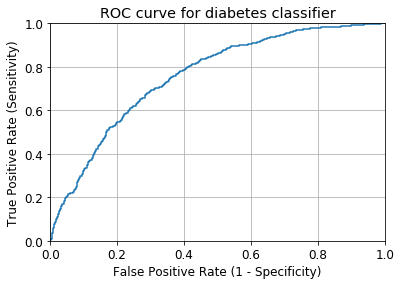

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [65]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [66]:
evaluate_threshold(0.5)

('Sensitivity:', 0.6705577172503242)
('Specificity:', 0.7155635062611807)


In [67]:
evaluate_threshold(0.08)

('Sensitivity:', 0.9857328145265889)
('Specificity:', 0.13059033989266544)


In [68]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(roc_auc_score(y_test, y_pred_prob[:, 1]))

0.757617943845
